# Clustering
**Course:** HUDK 4050, Week 7  
**Author:** Zecheng Chang  
**Asignment:** ICE5  
**Objectives:**  
At the end of this ICE, I'll be able to:
1. implement the K-Means algorithm to create clusters
2. create a a silhouette plot to evaluate the number of clusters

## Clustering and K-Means

In [1]:
# !pip install yellowbrick --user

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer


Next, I'll simulate some data on a two-dimensional plane with make_blobs. This function will return two things:
1. a set of data and 
2. the true labels for each observation. 

We are going to store them in two variables: twoDData and cluster_true.

In [3]:
twoDData, cluster_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

print("Here are the first 10 rows of twoDData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoDData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


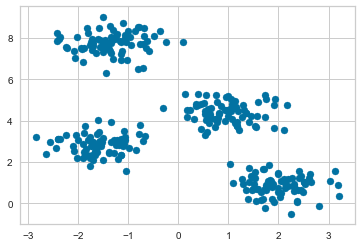

In [4]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

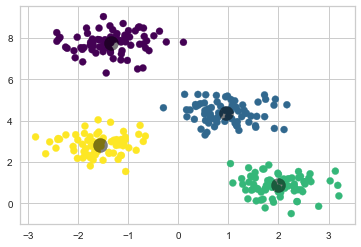

In [6]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); 

## Silhoutte Coefficient and Silhoutte Plot

In [7]:
silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning

In [14]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

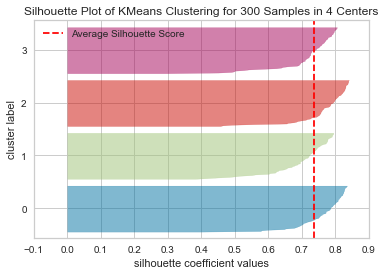

In [15]:
visualizer.fit(twoDData)
# Fit the data to the visualizer
visualizer.show()
# Finalize and render the figure.


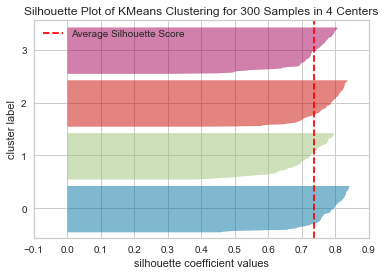

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f903a87a5d0>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [17]:
silhouette_visualizer(kmeans, twoDData, colors='yellowbrick')

## Clustering with K-means: Self-reported motivation

In [19]:
motivation = pd.read_csv("ICE5_Data.csv")
motivation.head(3)

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0


In [20]:
motivationNA = motivation.dropna()
motivationClean = motivationNA.drop(['id'], axis = 1)
motivationClean.head(3)

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0


In [21]:
# try 2 clusters first
motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)

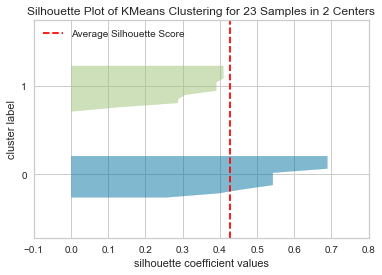

Silhouetter Score: 0.4278253443934091


In [22]:
silhouette_visualizer(motivationkmeans2, motivationClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(motivationClean, cluster_motivation2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

The score is 0.428 and the silhouette plot is not too bad. We can see that Cluster 0 has a lot more similarities while Cluster 1 is more heterogeneous.   
So we may want to increase the cluster number

In [23]:
# try 3 clusters
motivationkmeans3 = KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3 = motivationkmeans3.predict(motivationClean)

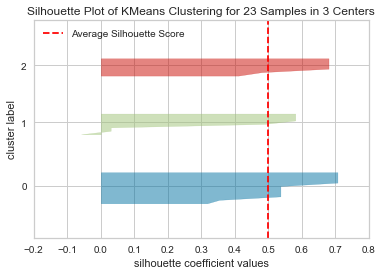

Silhouetter Score: 0.4995840033521631


In [24]:
silhouette_visualizer(motivationkmeans3, motivationClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(motivationClean, cluster_motivation3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

In [25]:
# try 4 clusters
motivationkmeans4 = KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4 = motivationkmeans4.predict(motivationClean)

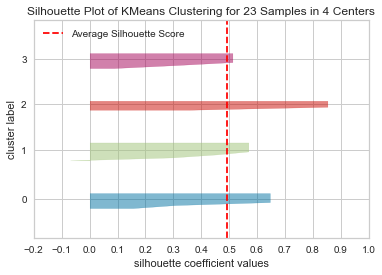

Silhouetter Score: 0.4939757511461826


In [26]:
silhouette_visualizer(motivationkmeans4, motivationClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(motivationClean, cluster_motivation4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

Overall, cluster = 3 is the best

In [27]:
motivation3cluster = motivationClean.copy(deep=True)

motivation3cluster['cluster'] = cluster_motivation3

motivation3cluster.head()

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,2
2,1,2.0,1,2.0,2.0,1
6,2,2.0,2,2.0,2.0,2
9,2,2.0,2,2.0,2.0,2
11,2,1.0,2,1.0,2.0,1
